# Assignment 1 - COMP 472


## Task 0
Remove document identifier, and also the topic label, which you don't need. 

In [11]:
from __future__ import division
from codecs import open

def read_documents(doc_file: str) -> (list, list):
    docs = []
    labels = []
    with open(doc_file, encoding='utf-8') as f:
        for line in f:
            words = line.strip().split()
            docs.append(words[3:])
            labels.append(words[1])
    return docs, labels
    
# Reads provide doc file.
# Args --> doc_file (str): Path to given data file.
# Returns --> Tuple of lists (words, labels) 
 

In [12]:
all_docs, all_labels = read_documents("C:\\Users\\jlibe\\github\\COMP472-A1\\sample-text.txt")

split_point = int(0.80*len(all_docs))
train_docs = all_docs[:split_point]
train_labels = all_labels[:split_point]
eval_docs = all_docs[split_point:]
eval_labels = all_labels[split_point:]

In [13]:
result = [[i,' '.join(j)] for i,j in zip(all_labels, all_docs)]

## Task 1
Plot the distribution of the number of the instances in each class (books, camera, dvd, health, music, or software).


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.DataFrame(result, columns=['sentiment','text'])

plt.style.use('seaborn')

sns.countplot('sentiment', data = data)

In [15]:
print(data)

      sentiment                                               text
0           neg  i bought this album because i loved the title ...
1           neg  i was misled and thought i was buying the enti...
2           neg  i have introduced many of my ell , high school...
3           pos  anything you purchase in the left behind serie...
4           pos  i loved these movies , and i cant wiat for the...
...         ...                                                ...
11909       neg  the story here dose n't matter . the main char...
11910       pos  i liked everything about this product except i...
11911       pos  this flash is the perfect back-up for a studio...
11912       neg  i had boughten this as a gift which turned out...
11913       neg  the pedometer arrive held prisoner in a diffic...

[11914 rows x 2 columns]


In [32]:
print ("X_train: ", len(train_docs))
print("X_test: ", len(eval_docs))
print("y_train: ", len(train_labels))
print("y_test: ", len(eval_labels))

X_train:  9531
X_test:  2383
y_train:  9531
y_test:  2383


In [67]:
#for counting frequently occurrence of negative and positive words.

from collections import Counter
import re

count1 = Counter(" ".join(data[data['sentiment']=='pos']["text"]).split()).most_common(30)
data1 = pd.DataFrame.from_dict(count1)
data1 = data1.rename(columns={0: "words of positive", 1 : "count"})
count2 = Counter(" ".join(data[data['sentiment']=='neg']["text"]).split()).most_common(30)
data2 = pd.DataFrame.from_dict(count2)
data2 = data2.rename(columns={0: "words of negative", 1 : "count_"})

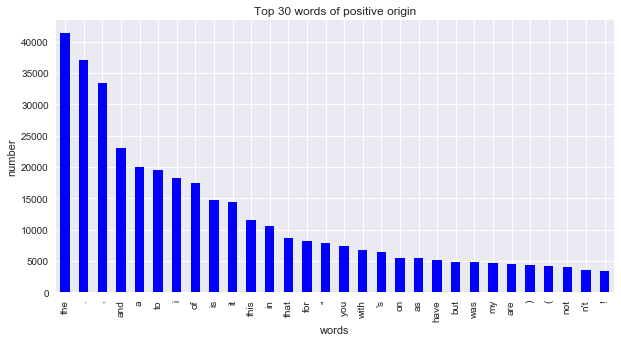

In [65]:

data1.plot.bar(legend = False, color = 'blue',figsize = (10,5))
y_pos = np.arange(len(data1["words of positive"]))
plt.xticks(y_pos, data1["words of positive"])
plt.title('Top 30 words of positive origin')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

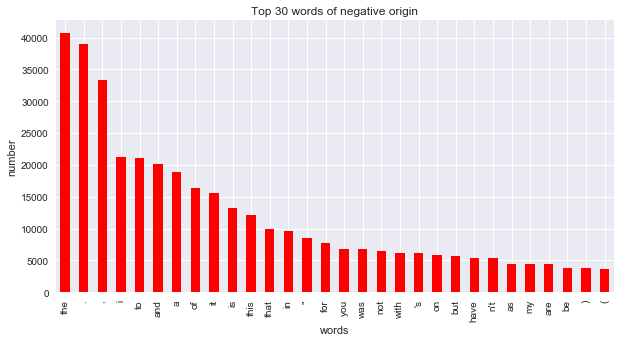

In [66]:
data2.plot.bar(legend = False, color = 'red', figsize = (10,5))
y_pos = np.arange(len(data2["words of negative"]))
plt.xticks(y_pos, data2["words of negative"])
plt.title('Top 30 words of negative origin')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

## Task 2

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

X = data['text']
y = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 37)
# not sure what random state does though

#tfidf_vect = TfidfVectorizer()
vectorizer = CountVectorizer(stop_words='english')

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

len(vectorizer.get_feature_names())

41893

In [71]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Naive Bayes Classifier
nb = MultinomialNB()

# Base - DT
dtc = DecisionTreeClassifier(criterion='entropy', random_state=1)

models = {'Naive Bayes classifier':nb, 'Decision Tree Classifier':dtc }

In [72]:
def eval_model(model):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    test_accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['pos', 'neg'], index=['pos','neg'])
    
    return test_accuracy, conf_matrix

## Task 3

In [73]:
test_accuracies = []
confusion_matrices = []
for name, model in models.items():
    test_acc, conf_matrix = eval_model(model) 
    test_accuracies.append(test_acc)
    confusion_matrices.append(conf_matrix)
    print(f'{name} -> Test accuracy - {test_acc*100:.2f}% \nand confusion matrix:\n{conf_matrix}' )

Naive Bayes classifier -> Test accuracy - 80.86% 
and confusion matrix:
     pos  neg
pos  998  221
neg  235  929
Decision Tree Classifier -> Test accuracy - 74.44% 
and confusion matrix:
     pos  neg
pos  908  311
neg  298  866
Extra Trees Classifier -> Test accuracy - 81.45% 
and confusion matrix:
     pos  neg
pos  996  223
neg  219  945


## Task 4


### References

[1] http://www.cse.chalmers.se/~richajo/dit862/assignment2.html#foot1
[2] https://scikit-learn.org/stable/modules/feature_extraction.html